<a href="https://colab.research.google.com/github/knoppin1/DATA-690-WANG/blob/master/Individual_Project/COVID_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Sand Box

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

--2020-11-03 19:40:07--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3326959 (3.2M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_US.csv.4’

time_series_covid19 100%[===================>]   3.17M  --.-KB/s    in 0.1s    

2020-11-03 19:40:07 (25.8 MB/s) - ‘time_series_covid19_confirmed_US.csv.4’ saved [3326959/3326959]



Read the saved CSV file into a pandas dataframe.

In [3]:
time_series_covid_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1738,1757,1764,1773,1785,1787,1791,1798,1805,1818,1828,1831,1839,1852,1863,1882,1898,1905,1911,1924,1928,1949,1966,1983,1989,1999,2010,2021,2023,2030,2048,2059,2074,2082,2103,2126,2141,2159,2173,2186
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5165,5456,5477,5526,5588,5606,5640,5997,6024,6048,6073,6085,6116,6134,6141,6172,6190,6203,6220,6248,6270,6285,6333,6350,6369,6375,6405,6443,6475,6615,6637,6658,6694,6712,6743,6768,6888,6940,6966,6985
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,857,873,882,885,886,886,896,898,902,921,921,921,923,927,927,939,942,942,944,951,950,965,968,977,981,981,988,996,997,1012,1031,1033,1033,1042,1045,1055,1056,1060,1061,1065
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,642,652,654,656,657,658,664,672,675,678,686,687,691,703,708,719,726,736,738,744,744,761,771,775,785,789,791,801,811,825,828,840,843,850,856,861,866,873,878,883
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1594,1608,1611,1617,1618,1621,1629,1634,1642,1655,1656,1662,1665,1673,1681,1689,1704,1713,1722,1742,1750,1768,1783,1807,1827,1838,1848,1873,1893,1911,1925,1932,1942,1972,1988,2009,2039,2074,2095,2108


In [4]:
time_series_covid_df.shape

(3340, 297)

Check for Missing Data
- FIPS code is the critical field to evaluate since it is used to join with other data sets in the study.

In [5]:
# Find records with missing FIPS code
time_series_covid_df[time_series_covid_df.FIPS.isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20
1267,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,151,154,157,157,167,169,168,179,185,190,191,191,191,192,194,197,198,200,201,201,201,202,202,204,204,204,208,208,209,213,218,218,229,230,241,244,253,258,262,262
1304,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,197,197,197,197,197,197,197,197,197,197,197,197,197,197,197
1336,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5591,5593,5593,5593,5599,5603,5611,5616,5622,5623,5623,5623,5627,5631,5637,5650,5650,5650,5693,5790,5796,5803,5832,5846,5846,6248,6267,6293,6329,6459,6510,6510,6538,6562,6691,6883,6958,6984,6984,7016
1591,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10909,11034,11085,11147,11276,11276,11276,11276,12111,12253,12387,12418,12488,12536,12623,12743,13077,13077,13077,13077,12934,13101,13263,13499,13614,13733,13792,13869,13904,13989,14117,14229,14313,14435,14583,14583,14986,15245,15372,15593
2954,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3230,3271,3307,3351,3372,3398,3425,3449,3510,3553,3613,3679,3721,3751,3859,3911,3974,4038,4109,4142,4188,4301,4363,4436,4509,4578,4624,4659,4754,4867,4956,5025,5101,5149,5197,5336,5438,5529,5614,5652
2959,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,630,637,641,647,661,671,681,697,707,727,752,764,766,794,809,824,855,880,890,908,943,977,996,1038,1058,1072,1077,1122,1150,1176,1203,1227,1253,1261,1293,1318,1358,1388,1435,1440
2978,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,195,204,207,214,216,221,223,229,233,235,243,250,256,257,268,277,285,289,292,308,320,337,349,357,359,362,373,385,408,422,439,452,453,466,488,512,532,548,566,575
2979,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4103,4164,4193,4210,4234,4255,4304,4354,4408,4478,4521,4563,4597,4653,4682,4747,4822,4873,4925,4990,5023,5113,5160,5252,5325,5376,5423,5504,5571,5705,5792,5852,5971,6055,6153,6273,6380,6474,6568,6632
2982,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,231,235,236,237,237,238,240,243,245,248,252,255,258,265,273,275,282,287,289,295,300,302,306,309,314,318,333,357,372,384,399,412,420,441,453,470,502,525,541,551
2990,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",0,0,0,0,0,0,0,0,0,0,0

Remove records without a FIPS code

In [6]:
time_series_covid_df = time_series_covid_df[time_series_covid_df.FIPS.notna()]
time_series_covid_df.shape

(3330, 297)

Use `melt` to convert the dataframe from wide format to long format

In [7]:
long_time_series_covid_df = time_series_covid_df.melt(
    id_vars=time_series_covid_df.columns[:11],
    value_vars=time_series_covid_df.columns[11:],
    var_name="Date",
    value_name="Confirmed"
)
long_time_series_covid_df.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0


In [8]:
# Remove irrelevant columns
irrelevant_columns = ['UID', 'iso2','iso3','code3','Admin2','Province_State','Country_Region','Lat','Long_']
covid_ts_df = long_time_series_covid_df.drop(irrelevant_columns, axis=1)
covid_ts_df.head(3)

,FIPS,Combined_Key,Date,Confirmed
0,1001.0,"Autauga, Alabama, US",1/22/20,0
1,1003.0,"Baldwin, Alabama, US",1/22/20,0
2,1005.0,"Barbour, Alabama, US",1/22/20,0


In [9]:
# Rename columns
covid_ts_df.rename(columns = {'Combined_Key':'County'}, inplace = True)
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
280385,17081.0,"Jefferson, Illinois, US",4/15/20,9
441695,39035.0,"Cuyahoga, Ohio, US",6/2/20,4581
662275,48479.0,"Webb, Texas, US",8/7/20,7540
643578,19131.0,"Mitchell, Iowa, US",8/2/20,76
595546,48225.0,"Houston, Texas, US",7/18/20,203


In [11]:
# Convert the FIPS code to an integer
covid_ts_df = covid_ts_df.assign(FIPS=lambda x: x['FIPS'].astype(int))
covid_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952380 entries, 0 to 952379
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   FIPS       952380 non-null  int64 
 1   County     952380 non-null  object
 2   Date       952380 non-null  object
 3   Confirmed  952380 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 29.1+ MB


In [14]:
covid_ts_df.sample(5)

,FIPS,County,Date,Confirmed
141613,31083,"Harlan, Nebraska, US",3/4/20,0
185610,72129,"San Lorenzo, Puerto Rico, US",3/17/20,0
380392,18087,"LaGrange, Indiana, US",5/15/20,48
121999,39003,"Allen, Ohio, US",2/27/20,0
468100,36009,"Cattaraugus, New York, US",6/10/20,96


In [15]:
def scatter_plot(x_list, y_list, x_label, y_label, suptitle, title):

    assert len(x_list) == len(y_list) # verify lists are of eaual length

    plt.figure(figsize=(14, 8))  # in inches   
    plt.xlabel('\n'+ x_label, fontsize=16)
    plt.ylabel(y_label + '\n', fontsize=16)
    plt.suptitle(suptitle, fontsize=20, va='bottom')
    plt.title(title  + '\n', fontsize=18, va='center')
    plt.ticklabel_format(style='plain')

    plt.scatter(x_list, y_list, alpha=1., c="blue", edgecolors='none')

    plt.show()

In [18]:
hc = covid_ts_df[covid_ts_df['County']=='Howard, Maryland, US']
hc

,FIPS,County,Date,Confirmed
1250,24027,"Howard, Maryland, US",1/22/20,0
4580,24027,"Howard, Maryland, US",1/23/20,0
7910,24027,"Howard, Maryland, US",1/24/20,0
11240,24027,"Howard, Maryland, US",1/25/20,0
14570,24027,"Howard, Maryland, US",1/26/20,0
...,...,...,...,...
936980,24027,"Howard, Maryland, US",10/29/20,5894
940310,24027,"Howard, Maryland, US",10/30/20,5930
943640,24027,"Howard, Maryland, US",10/31/20,5959
946970,24027,"Howard, Maryland, US",11/1/20,5988


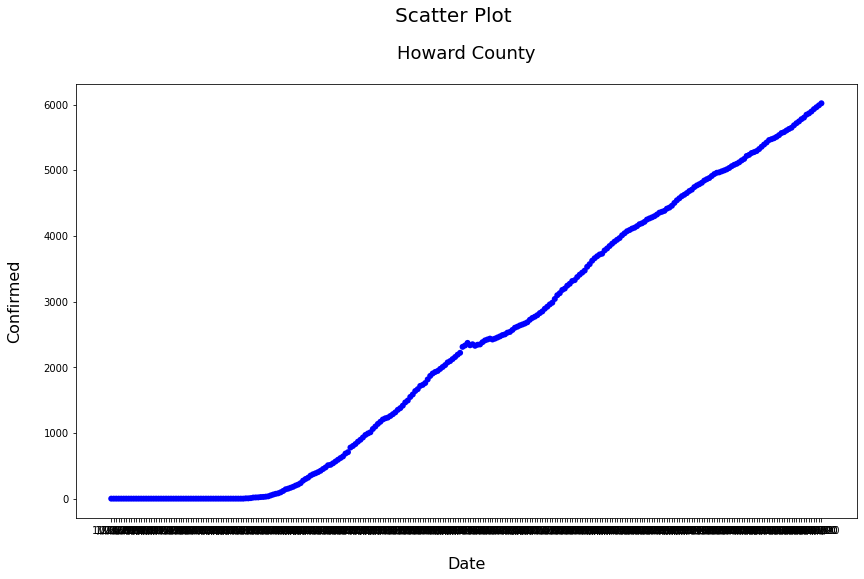

In [19]:
scatter_plot(hc['Date'],hc['Confirmed'],'Date','Confirmed','Scatter Plot','Howard County')

In [ ]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xlabel('\n'+'Population', fontsize=16)
plt.ylabel('County' + '\n', fontsize=16)
plt.title('15 Most Populated Counties', fontsize=20, va='bottom')
plt.barh(x_list['Date'], x_list['Population_2019'])
plt.show()